# TensorFlow for Deep Learning Beginners 101

# ตัวอย่าง หาค่าที่มาที่สุดใน List  : maximum problem

# 1.prepare dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
y = []
for i in range(4000):
  a = np.arange(30)
  np.random.shuffle(a)
  k = a[:5]
  X1.append(k[0])
  X2.append(k[1])   
  X3.append(k[2])
  X4.append(k[3])  
  X5.append(k[4])
  
  y.append(max(k))

In [3]:
for i in range(3000):
  a = np.arange(60)
  np.random.shuffle(a)
  k = a[:5]
  X1.append(k[0])
  X2.append(k[1])   
  X3.append(k[2])
  X4.append(k[3])  
  X5.append(k[4])
  
  y.append(max(k))

In [4]:
for i in range(3000):
  a = np.arange(100)
  np.random.shuffle(a)
  k = a[:5]
  X1.append(k[0])
  X2.append(k[1])   
  X3.append(k[2])
  X4.append(k[3])  
  X5.append(k[4])
  
  y.append(max(k))

In [5]:
df = pd.DataFrame({'X1':X1,'X2':X2,'X3':X3,'X4':X4,'X5':X5,'y':y})
df.sample(5)

X1  X2  X3  X4  X5   y
369    3   7  10  18  28  28
3637  21  17  13   7   4  21
2077  14   0  17  13  16  17
224   21   7  13  26  19  26
4113  41  16   8  38  27  41

In [6]:
X = df[['X1','X2','X3','X4','X5']]
y = df['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
len(X_train),len(X_test)

(7000, 3000)

In [9]:
X_train.head(5)

X1  X2  X3  X4  X5
9069  10  36  78  91  48
2603   1   3   5  18   6
7738  15  76  42  45  10
1579   4   7  19   8   6
5058  42  58  46  49  53

In [10]:
y_train.head(5)

9069    91
2603    18
7738    76
1579    19
5058    58
Name: y, dtype: int64

# 2.define the model

In [11]:
#!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

2022-10-21 07:17:54.844623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# neural network with keras 
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape = (5,)),
        tf.keras.layers.Dense(units=256, activation="relu"),
        tf.keras.layers.Dense(units=256, activation="relu"),
        tf.keras.layers.Dense(units=256, activation="relu"), 
        tf.keras.layers.Dense(units=1, activation="relu")
    ])

2022-10-21 07:18:01.019224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 3.compile the model

In [14]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________


# 4.fit the model

In [15]:
model.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
700/700 [==============================] - 1s 1ms/step - loss: 106.2163
Epoch 2/30
700/700 [==============================] - 1s 1ms/step - loss: 8.1446
Epoch 3/30
700/700 [==============================] - 1s 1ms/step - loss: 3.4902
Epoch 4/30
700/700 [==============================] - 1s 1ms/step - loss: 1.6194
Epoch 5/30
700/700 [==============================] - 1s 1ms/step - loss: 1.0709
Epoch 6/30
700/700 [==============================] - 1s 1ms/step - loss: 0.9009
Epoch 7/30
700/700 [==============================] - 1s 1ms/step - loss: 0.7668
Epoch 8/30
700/700 [==============================] - 1s 1ms/step - loss: 0.6765
Epoch 9/30
700/700 [==============================] - 1s 1ms/step - loss: 0.6542
Epoch 10/30
700/700 [==============================] - 1s 1ms/step - loss: 0.5479
Epoch 11/30
700/700 [==============================] - 1s 1ms/step - loss: 0.4344
Epoch 12/30
700/700 [==============================] - 1s 1ms/step - loss: 0.5084
Epoch 13/30
700/700 [==

# 5.evaluation and prediction

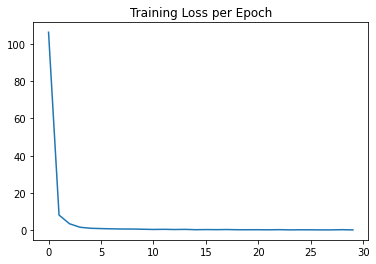

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [17]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.1389


0.1388515681028366

# หาค่ามากที่สุดใน list

In [18]:
model.predict([[442,222,571,124,82]])

1/1 [==============================] - 0s 94ms/step


array([[570.298]], dtype=float32)

In [19]:
model.predict([[83,22,55,102,71]])

1/1 [==============================] - 0s 35ms/step


array([[102.20181]], dtype=float32)

In [20]:
model.predict([[183,222,455,302,711]])

1/1 [==============================] - 0s 35ms/step


array([[708.0289]], dtype=float32)